# Time Series Classification

![](graphics/mlts-time-series-classification.png)

## Preamble

In [35]:
import ai_dojo
ai_dojo.setup_plot_style(dark=True)

In [36]:
import numpy
import pandas
import sktime

## Example: Time Series Classification

In the following example we work with [**sktime**](https://www.sktime.org/en/latest/get_started.html) and an example time series that comes with the library.

The [**Italy Power Demand Dataset**](http://timeseriesclassification.com/description.php?Dataset=ItalyPowerDemand) asks you to distinguish summer from winter months by looking at the hourly power consumption of the country. Power consumption patterns vary strongly over the year, which enables automatic classification.


In [37]:
from sktime import datasets

In [38]:
power_demand_series, power_demand_labels = datasets.load_italy_power_demand()


In [39]:
power_demand_series

,dim_0
0,0 -0.710518 1 -1.183320 2 -1.372442 3...
1,0 -0.993009 1 -1.426786 2 -1.579884 3...
2,0 1.319067 1 0.569774 2 0.195128 3...
3,0 -0.812444 1 -1.157553 2 -1.416385 3...
4,0 -0.972840 1 -1.390518 2 -1.536705 3...
...,...
1024,0 0.431025 1 -0.518479 2 -1.118165 3...
1025,0 -0.612215 1 -1.049884 2 -1.362505 3...
1026,0 -1.262706 1 -1.449774 2 -1.519924 3...
1027,0 0.714321 1 0.629029 2 0.117277 3...


In [40]:
power_demand_labels = pandas.Series(power_demand_labels, dtype="category")
power_demand_labels

0       1
1       1
2       2
3       2
4       1
       ..
1091    2
1092    1
1093    2
1094    2
1095    2
Length: 1096, dtype: category
Categories (2, object): ['1', '2']

In [41]:
labels = {'1': "winter", '2': "summer"}

<AxesSubplot: title={'center': 'winter'}>

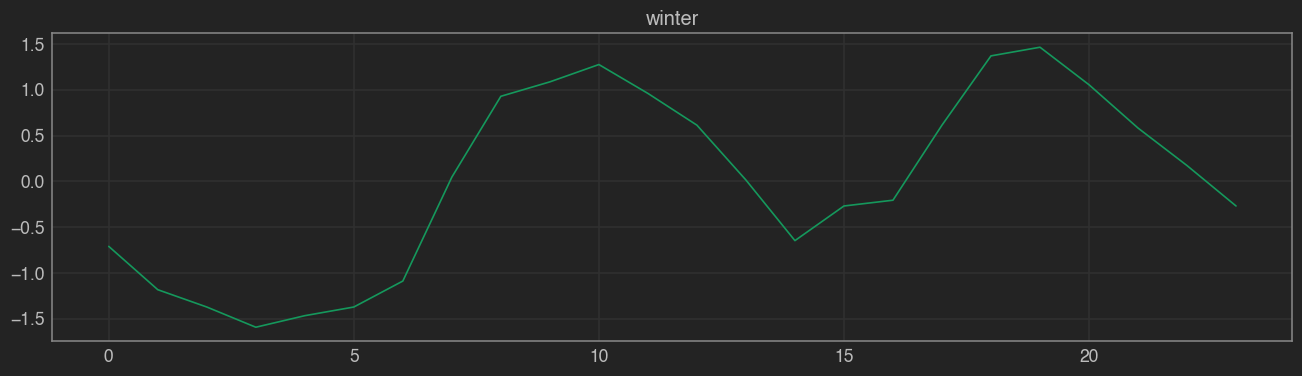

In [42]:
power_demand_series.iloc[0]["dim_0"].plot(title=f"{labels[power_demand_labels[0]]}")

<AxesSubplot: title={'center': 'summer'}>

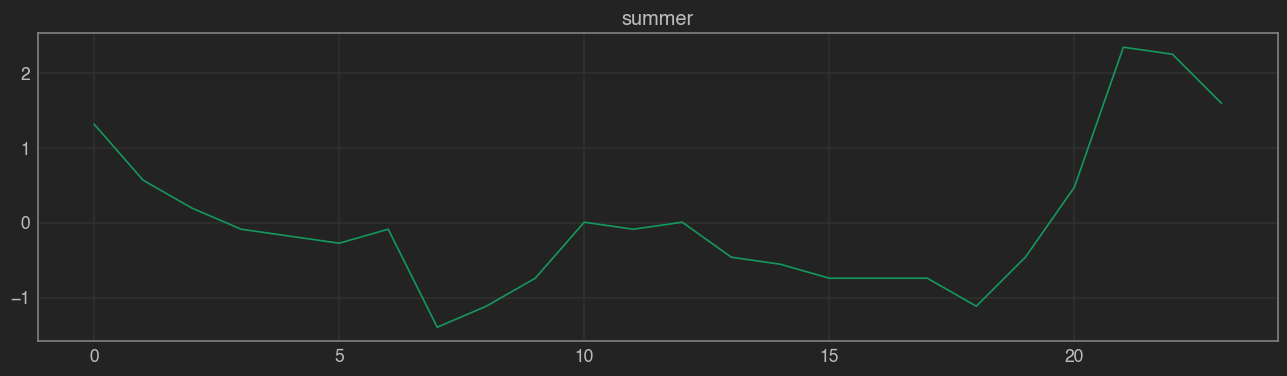

In [43]:
power_demand_series.iloc[2]["dim_0"].plot(title=f"{labels[power_demand_labels[2]]}")

<AxesSubplot: >

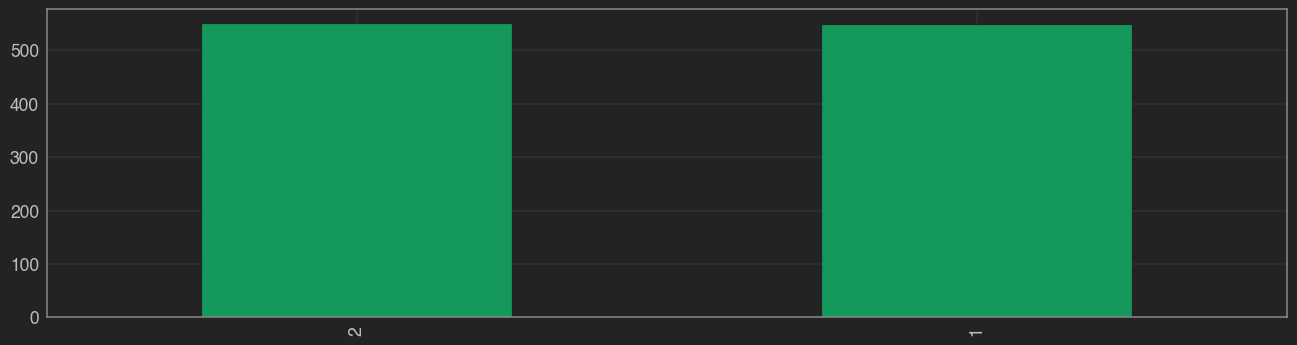

In [44]:
power_demand_labels.value_counts().plot(kind="bar")

### Applying the TimeSeriesForest Algorithm

In [45]:
from sktime.classification.interval_based import TimeSeriesForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [46]:
X_train, X_test, y_train, y_test = train_test_split(power_demand_series, power_demand_labels)

In [47]:
X_train

,dim_0
591,0 -0.994214 1 -1.301109 2 -1.473738 3...
717,0 -0.357886 1 -0.837115 2 -1.316345 3...
929,0 -0.632195 1 -1.186999 2 -1.355852 3...
1015,0 -0.461794 1 -0.871195 2 -1.280595 3...
215,0 -0.907337 1 -1.299427 2 -1.420070 3...
...,...
528,0 -0.423236 1 -0.912310 2 -1.138036 3...
674,0 -1.044385 1 -1.325046 2 -1.519351 3...
347,0 -0.771325 1 -1.146760 2 -1.406676 3...
977,0 -0.953027 1 -1.154056 2 -1.556115 3...


In [48]:
classifier = TimeSeriesForestClassifier()
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
accuracy_score(y_test, y_pred)

0.9635036496350365

In [49]:
y_pred = classifier.predict(X_test)

<AxesSubplot: title={'center': 'predicted: winter, actual: winter'}>

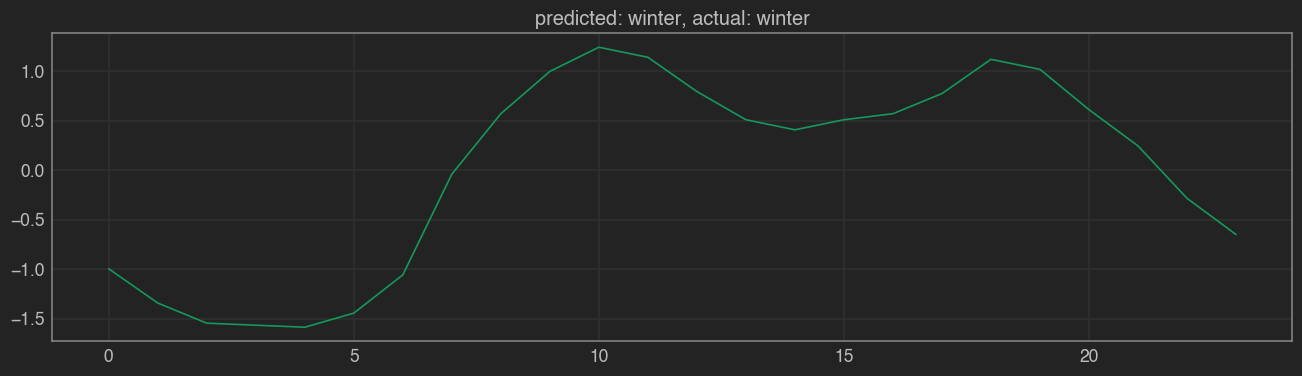

In [56]:
# get a random index i from the test set
i = numpy.random.randint(0, len(X_test))
pandas.Series(X_test.iloc[i]["dim_0"]).plot(title=f"predicted: {labels[y_pred[i]]}, actual: {labels[y_test.iloc[i]]}")

---
_This notebook is licensed under a [Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International (CC BY-NC-SA 4.0)](https://creativecommons.org/licenses/by-nc-sa/4.0/). Copyright © 2018-2021 [Point 8 GmbH](https://point-8.de)_